In [33]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

%matplotlib inline

**Problem statement**:
Given a positive integer “k” and a list of integer numbers, look for the numbers within the list, that are less than k. Consider an appropriate number of qubits and explain why your proposal is valid for all kinds of numbers in case 


def less_than_k (int:k, list[int] ,list_n):
     “””
k : integer value that is the positive number to compare in list_n,
list_n : integer list that has positive numbers.

**Example**: 
A = less_than_k (7,[4,9,11,14,1,13,6,15])
print(A)

“4,1,6”

**Logic**:
We are given a list of arbitrary lengths and filled with positive integers, we are also given another positive integer for comparing. So my solution is to iterate through the list and individually compare each pair (the k integer and the integer inside the list). 
For that to happen we need first to devise a quantum circuit that will compare two integers. Since we are dealing in qubits we will first be required to transform the integers into binary base integers
Case 1: If the binary bits are of unequal length, then we pad the smaller bit with zeros and consider it as case 2.
Case 2: If the binary bits are of equal length, then we need to apply the quantum circuit. The circuit first encodes the bits into the circuit. The qubits in the qra register represent the first number and the qubits in qrb the second accordingly. qraux make up the auxiliary qubits and qrint the intermediate qubits. We iterate through the bits from right to left and compare each bit individually. If the higher unit places differ then clearly the larger one is bigger and so on. 
Meaning of results : 
‘01’ means that b is the lesser integer
‘10’ means that a is the lesser integer

Now once we know how to calculate which integer is smaller we can iterate through the loop apply this to each item iteratively and store the lesser integers in a list. We can then print the smaller integer list at the end of the loop.

This logic is valid in all types of cases as we can compare integers of any size (though the circuit size and number of qubits increase considerably)

In [34]:
def encode(bit):
    qr = QuantumRegister(1, "number")
    qc = QuantumCircuit(qr)
    if (bit == "1"):
        qc.x(qr[0])
    return qc

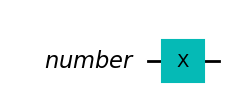

In [88]:
qce = encode('1')
qce.draw('mpl')

In [35]:
def bit_compare():
    qr = QuantumRegister(2, "bits")
    aux = QuantumRegister(2, "aux")
    
    qc = QuantumCircuit(qr, aux)
    qc.x(qr[1])
    qc.mcx(qr, aux[0])
    qc.x(qr[0])
    qc.x(qr[1])
    qc.mcx(qr, aux[1])
    qc.x(qr[0])
    
    return qc

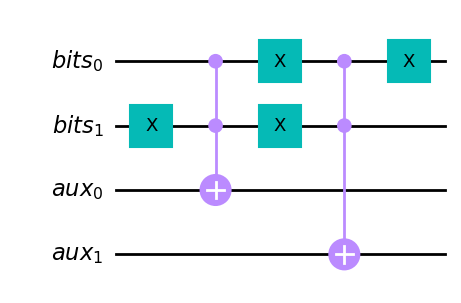

In [89]:
qcbc = bit_compare()
qcbc.draw('mpl')

In [108]:
def compare_bitstring(bitstring_a, bitstring_b, exec=True):
    
    
    bitsb = len(bitstring_b)
    bits = len(bitstring_a)
    if bitsb != bits: 
        if bitsb<bits:
            bitstring_b = ('0'*(bits-bitsb)) + bitstring_b
        else:
            bitstring_a = ('0'*(bitsb-bits)) + bitstring_a

    qra = QuantumRegister(bits, "a")
    qrb = QuantumRegister(bits, "b")
    qraux = QuantumRegister(2*bits, "aux")
    qrint = QuantumRegister(bits-1, "int")
    cr = ClassicalRegister(2)

    qc = QuantumCircuit(qra, qrb, qraux, qrint, cr)

    for i in range(bits):
        qc.append(encode(bitstring_a[i]), [qra[i]])
        qc.append(encode(bitstring_b[i]), [qrb[i]])
        qc.append(bit_compare(), [qra[i], qrb[i], qraux[2*i], qraux[2*i+1]])
        
        if i < bits-1:
            qc.x(qraux[2*i])
            qc.x(qraux[2*i+1])
            qc.mcx([qraux[2*i], qraux[2*i+1]], qrint[i])
            qc.x(qraux[2*i])
            qc.x(qraux[2*i+1])
        
    for i in range(0, bits-1):
        qc.mcx([qraux[2*(-i-1)],  qrint[-i]], qraux[2*(-i)])
        qc.mcx([qraux[2*(-i-1)+1],  qrint[-i]], qraux[2*(-i)+1])
        
    qc.measure(qraux[0], cr[0])
    qc.measure(qraux[1], cr[1])
    if exec:
        backend = Aer.get_backend('qasm_simulator')         
        result = execute(qc,backend, shots=1000).result()
        counts = result.get_counts()
        return counts
    else:
        return qc

In [110]:
counts = compare_bitstring("1111", "1110")
print(counts)
print(list(counts.keys())[0])

{'01': 1000}
01


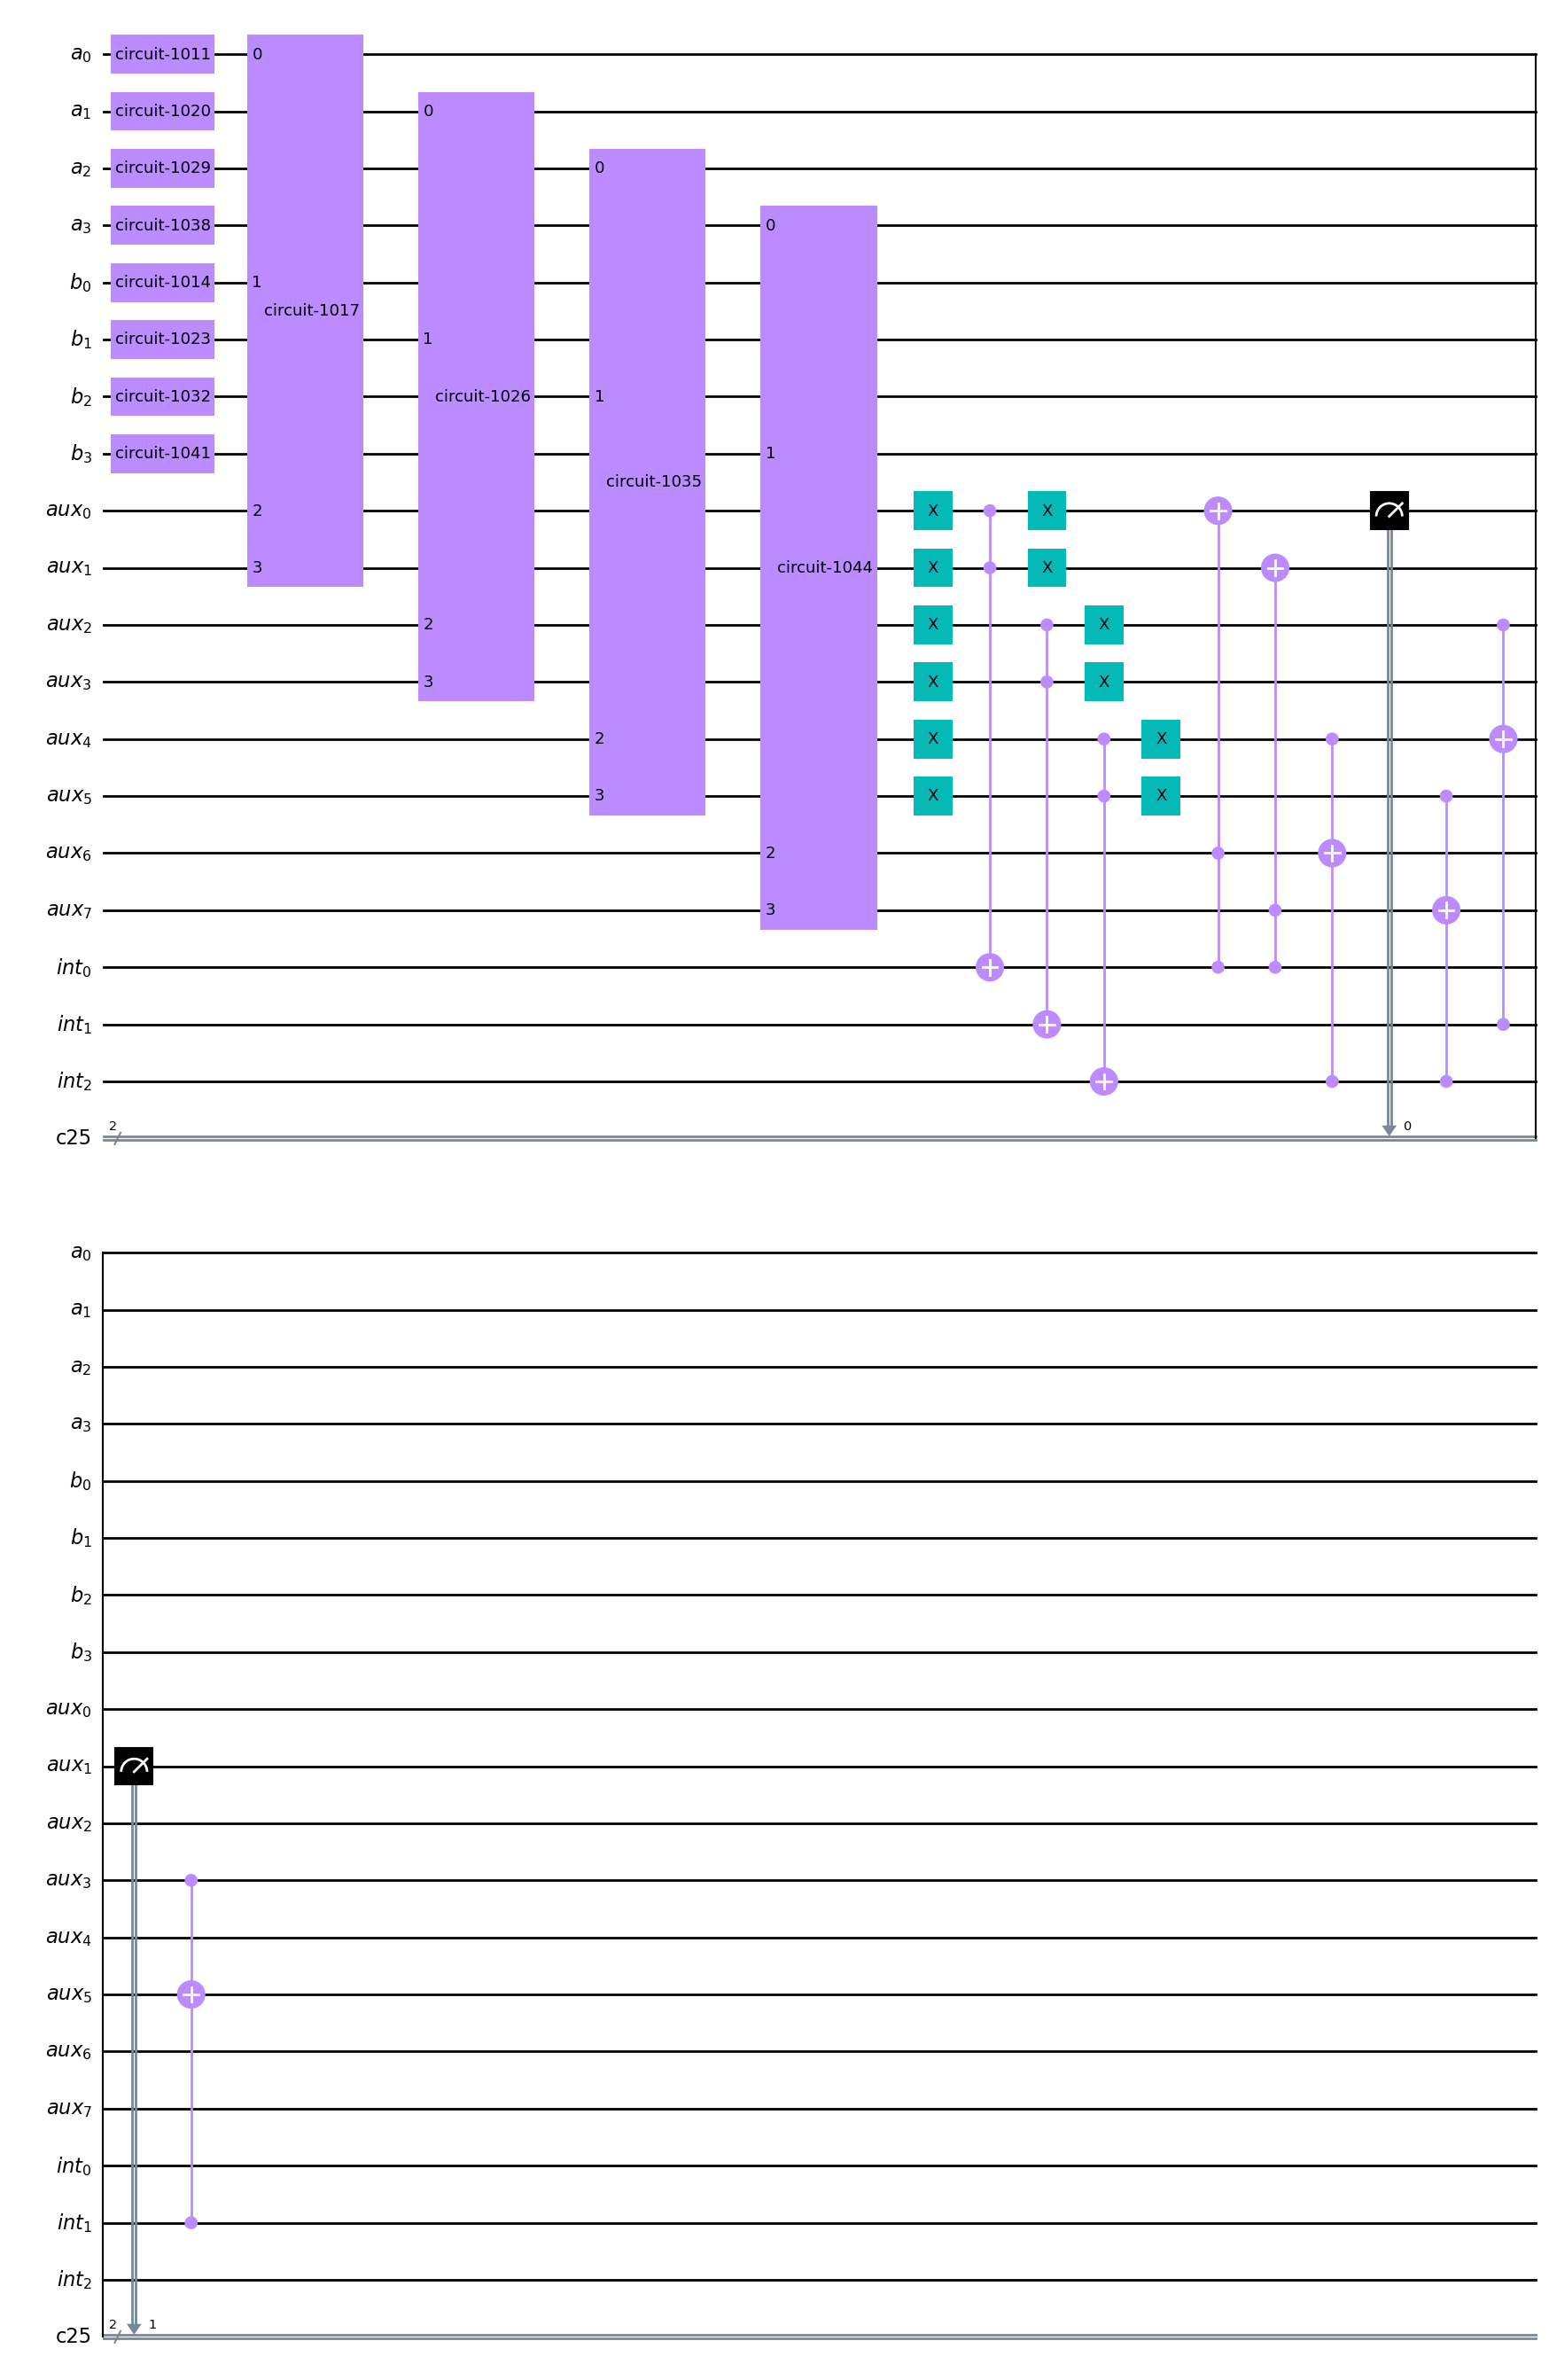

In [59]:
qc.draw('mpl')

In [75]:
def dec_to_bin(x):
    return str(bin(x)[2:])

In [85]:
def less_than_k (k,list_n):
    a = dec_to_bin(k)
    list_s = []
    for i in list_n:
        b = dec_to_bin(i)
        counts = compare_bitstring(a, b)
        res = list(counts.keys())[0]
        if res=='01':
            list_s.append(i)
    if len(list_s) != 0:
        return ",".join(str(item) for item in list_s)
    else:
        return "No smaller elements found"
            

In [86]:
A = less_than_k (7,[4,9,11,14,1,13,6,15])
print(A)

4,1,6


**Bibliography**: 

[1] https://www.researchgate.net/publication/228574906_Quantum_bit_string_comparator_Circuits_and_applications

[2] https://pyqml.medium.com/comparing-two-numbers-using-a-quantum-algorithm-22910cea56aa#:~:text=If%20all%20digits%20are%20equal,of%20the%20four%2Ddigit%20bitstrings.
